In [74]:
# %load ../font.py
#!/usr/bin/env python

# In[ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import platform

if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        plt.rc('font', family='Malgun Gothic') 

plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결



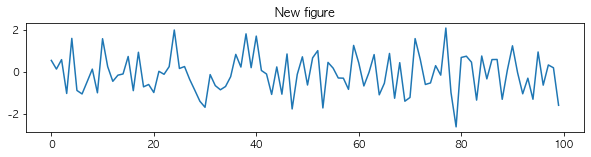

In [54]:
# 하나의 페이지에 하나의 그래프 그림
f1 = plt.figure(figsize=(10,2)) # 사이즈는 : Inch
plt.title('New figure')
plt.plot(np.random.randn(100))
plt.show()

AxesSubplot(0.125,0.536818;0.775x0.343182)
AxesSubplot(0.125,0.125;0.775x0.343182)


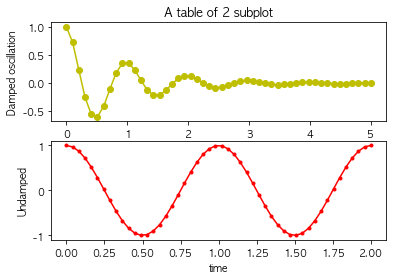

In [55]:
# subplot : 하나의 페이지에 여러개의 그래프 생성

x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

ax1 = plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'yo-')
plt.title('A table of 2 subplot')
plt.ylabel('Damped oscillation')
print(ax1)


ax2 = plt.subplot(2, 1, 2)
plt.plot(x2, y2, 'r.-')
plt.xlabel('time')
plt.ylabel('Undamped')
print(ax2)
plt.show()

In [56]:
# 선 그래프
# 시도별 진출입 인구수

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('dataset/시도별 전출입 인구수.xlsx')
df.head(5)


,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [57]:
# 데이터 전처리 작업
# 1. Nan 처리
# 전출지의 Nan 자료를 수정 -> 이전 자료의 값을 대체
# Nan 자료를 수정 : ffill 이전 자료로 대체 bfill : 이후 자료로 대체
# value = 값 -> 지정하는 값으로 수정
df.fillna(method='ffill', inplace=True) 
df.head(5)

# 2. 필요한 자료만 추출
# 서울특별시에서 다른 지역으로 전출한 자료만 추출

mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
# print(df_seoul.head())

# '전출지별'은 같은 자료이므로 삭제
df_seoul = df_seoul.drop('전출지별', axis=1)


# 3. 컬러명 또는 인덱스 재설정
# 전입지별을 전입지로 변경

df_seoul = df_seoul.rename({'전입지별': '전입지'}, axis=1)

# 전입지 컬럼을 인데스로 변경

df_seoul.set_index('전입지', inplace=True)
df_seoul

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,278411,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433


In [58]:
# 서울에서 경기도로 전입한 인구수를 그래프로 확인
sr_one = df_seoul.loc['경기도']
sr_one.head(3)


1970    130149
1971    150313
1972     93333
Name: 경기도, dtype: object

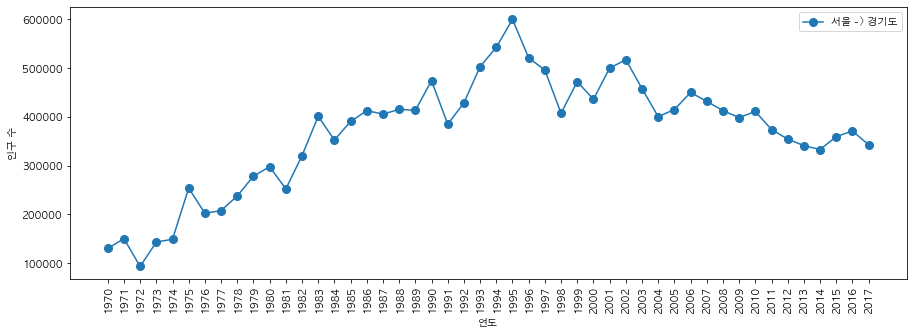

In [59]:
plt.figure(figsize=(15, 5))
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=8) # x축의 데이터를 세로로 회전
plt.xticks(size=10, rotation='vertical') # 그래프의 제목
plt.xlabel('연도') # x 축 제목
plt.ylabel('인구 수') # y 축 제목
plt.legend(labels=['서울 -> 경기도'], loc='best')
plt.show()



In [60]:
# df_seoul.T.plot()

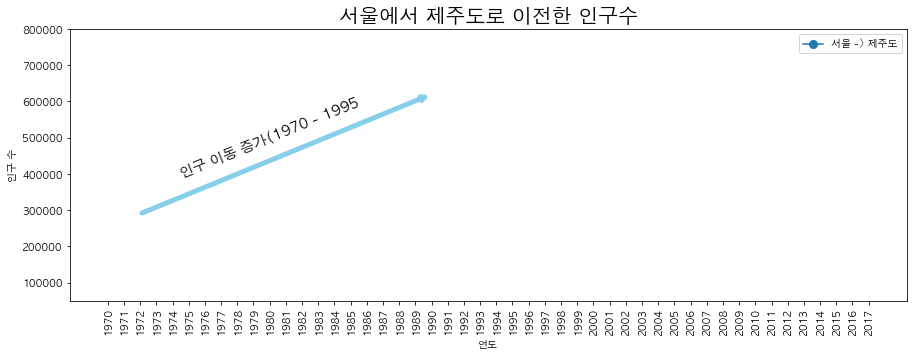

In [60]:
# 서울에서 제주도로 이동한 인구수만 검색해서 그래프로 나타내기

sr_two = df_seoul.loc['제주특별자치도']
plt.figure(figsize=(15, 5))
plt.plot(sr_two.index, sr_two.values, marker='o', markersize=8)
plt.title('서울에서 제주도로 이전한 인구수', size=20)
plt.xticks(size=10, rotation='vertical')
plt.xlabel('연도')
plt.ylabel('인구 수')
plt.legend(labels=['서울 -> 제주도'], loc='best')

# annotate 추가
plt.ylim(50000, 800000)
plt.annotate('', 
             xy=(20,620000),
             xytext=(2,290000),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', color='skyblue', lw=5)
            )
plt.annotate('인구 이동 증가(1970 - 1995', 
            xy=(10,390000),
             rotation=22,
             va='baseline',
             ha='center',
             fontsize=14
            )

plt.show()


/var/folders/8x/my7blpjs0bg1hmjhzgvz02th0000gn/T/ipykernel_1448/3528242342.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_one.index, rotation=45)
/var/folders/8x/my7blpjs0bg1hmjhzgvz02th0000gn/T/ipykernel_1448/3528242342.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_two.index, rotation=45)


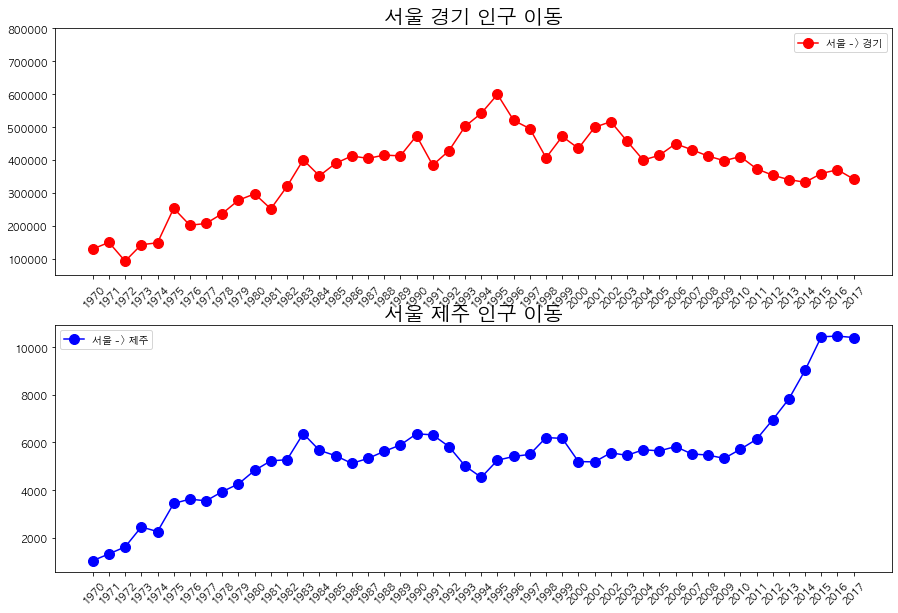

In [104]:
# 서울 -> 경기도
# 서울 -> 제주도 이동한 인구수의 그래프를 동시에 표현

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2) 

# ax1에 서울 경기도 출력

ax1.plot(sr_one, marker='o', markersize=10, color='r', label='서울 -> 경기')
ax2.plot(sr_two, marker='o', markersize=10, color='b', label='서울 -> 제주')
ax1.set_title('서울 경기 인구 이동', size=20)
ax2.set_title('서울 제주 인구 이동', size=20)
ax1.legend(loc='best')
ax2.legend(loc='best')

# y축 범위 (최소값, 최대값)
ax1.set_ylim(50000, 800000)
# ax2.set_ylim(50000, 800000)


# x축 연도 라벨 지정 -> 75도 기울여서

ax1.set_xticklabels(sr_one.index, rotation=45)
ax2.set_xticklabels(sr_two.index, rotation=45)

# 눈굼 라벨크기
ax1.tick_params(axis='x', labelsize=10)
ax2.tick_params(axis='x', labelsize=10)
plt.show()


/var/folders/8x/my7blpjs0bg1hmjhzgvz02th0000gn/T/ipykernel_929/86288911.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(col_year, rotation=75)


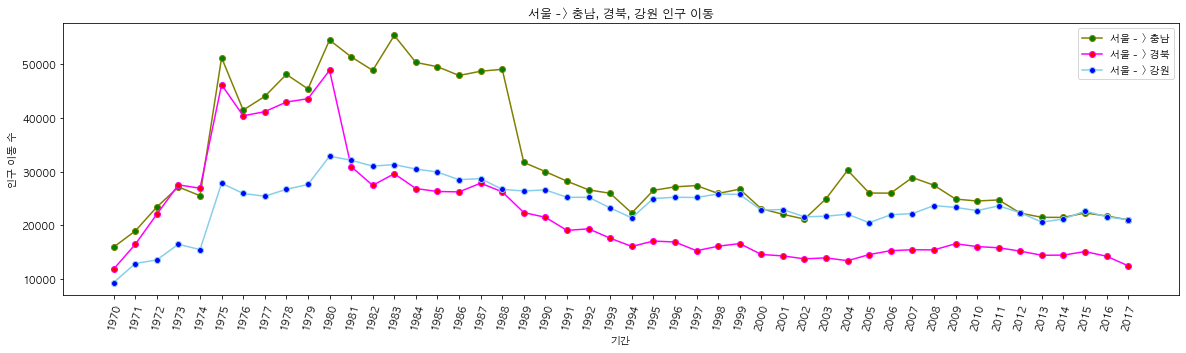

In [61]:
# 하나의 axes에 여러개 그래프를 추가로 그림
# 충청남도, 경상북도, 강원도 1970~2018

col_year = list(map(str, range(1970, 2018)))
df_1 = df_seoul.loc[['충청남도', '경상북도', '강원도'], col_year]
df_1

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)
ax.plot(col_year, df_1.loc['충청남도', :], marker='o', markerfacecolor='g', color='olive', label='서울 - > 충남')
ax.plot(col_year, df_1.loc['경상북도', :], marker='o', markerfacecolor='r', color='magenta', label='서울 - > 경북')
ax.plot(col_year, df_1.loc['강원도', :], marker='o', markerfacecolor='b', color='skyblue', label='서울 - > 강원')

ax.legend(loc='best')
ax.set_title('서울 -> 충남, 경북, 강원 인구 이동')
ax.set_xlabel('기간')
ax.set_ylabel('인구 이동 수')

ax.set_xticklabels(col_year, rotation=75)

plt.show()

/var/folders/8x/my7blpjs0bg1hmjhzgvz02th0000gn/T/ipykernel_929/1748225015.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(col_year, rotation=75)


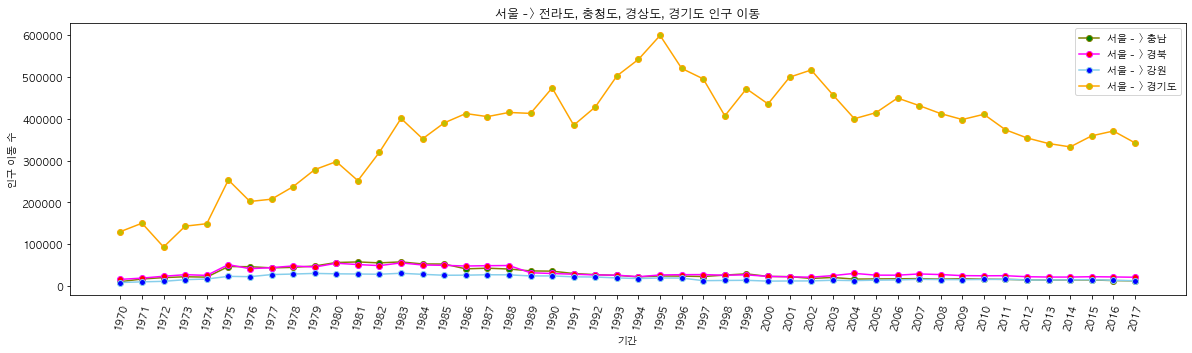

In [62]:
df_seoul.index
# 전라남도, 충청남도, 경상남도, 경기도로 이동한 인구수를
# 1. 하나의 화면에 모두 그리기
# 2. 화면을 4개로 분할해서 그래프 그리기
col_year = list(map(str, range(1970, 2018)))
df_1 = df_seoul.loc[['전라남도', '충청남도', '경상남도', '경기도'], col_year]
df_1

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)
ax.plot(col_year, df_1.loc['전라남도', :], marker='o', markerfacecolor='g', color='olive', label='서울 - > 충남')
ax.plot(col_year, df_1.loc['충청남도', :], marker='o', markerfacecolor='r', color='magenta', label='서울 - > 경북')
ax.plot(col_year, df_1.loc['경상남도', :], marker='o', markerfacecolor='b', color='skyblue', label='서울 - > 강원')
ax.plot(col_year, df_1.loc['경기도', :], marker='o', markerfacecolor='y', color='orange', label='서울 - > 경기도')

ax.legend(loc='best')
ax.set_title('서울 -> 전라도, 충청도, 경상도, 경기도 인구 이동')
ax.set_xlabel('기간')
ax.set_ylabel('인구 이동 수')

ax.set_xticklabels(col_year, rotation=75)

plt.show()

/var/folders/8x/my7blpjs0bg1hmjhzgvz02th0000gn/T/ipykernel_929/1093157963.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_one.index, rotation=45)
/var/folders/8x/my7blpjs0bg1hmjhzgvz02th0000gn/T/ipykernel_929/1093157963.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_two.index, rotation=45)
/var/folders/8x/my7blpjs0bg1hmjhzgvz02th0000gn/T/ipykernel_929/1093157963.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_three.index, rotation=45)
/var/folders/8x/my7blpjs0bg1hmjhzgvz02th0000gn/T/ipykernel_929/1093157963.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_four.index, rotation=45)


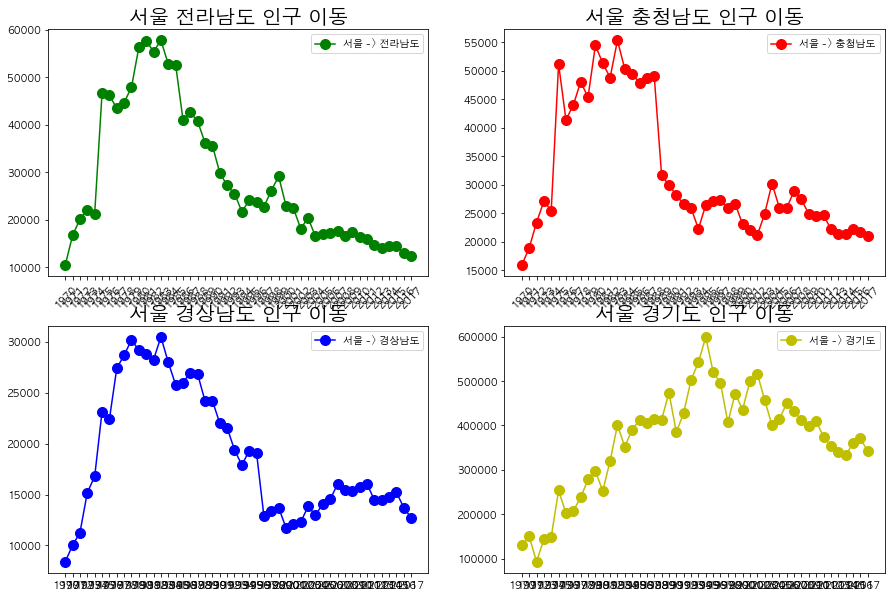

In [63]:
sr_one = df_seoul.loc['전라남도']
sr_two = df_seoul.loc['충청남도']
sr_three = df_seoul.loc['경상남도']
sr_four = df_seoul.loc['경기도']


fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2) 
ax3 = fig.add_subplot(2, 2, 3) 
ax4 = fig.add_subplot(2, 2, 4) 

ax1.plot(sr_one, marker='o', markersize=10, color='g', label='서울 -> 전라남도')
ax2.plot(sr_two, marker='o', markersize=10, color='r', label='서울 -> 충청남도')
ax3.plot(sr_three, marker='o', markersize=10, color='b', label='서울 -> 경상남도')
ax4.plot(sr_four, marker='o', markersize=10, color='y', label='서울 -> 경기도')

ax1.set_title('서울 전라남도 인구 이동', size=20)
ax2.set_title('서울 충청남도 인구 이동', size=20)
ax3.set_title('서울 경상남도 인구 이동', size=20)
ax4.set_title('서울 경기도 인구 이동', size=20)

ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')


ax1.set_xticklabels(sr_one.index, rotation=45)
ax2.set_xticklabels(sr_two.index, rotation=45)
ax1.set_xticklabels(sr_three.index, rotation=45)
ax1.set_xticklabels(sr_four.index, rotation=45)

plt.show()

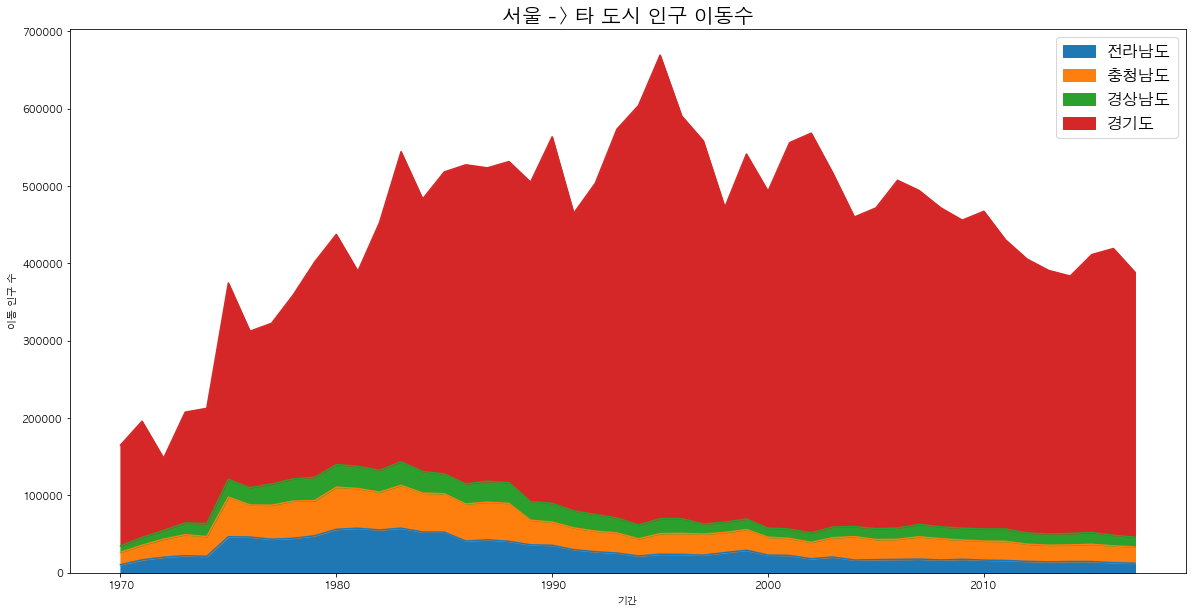

In [64]:
df_3 = df_1.T
df_3.index = df_3.index.map(int)
df_3.index

ax = df_3.plot(kind='area', figsize=(20,10))
ax.set_title('서울 -> 타 도시 인구 이동수', size=20)
ax.set_ylabel('이동 인구 수')
ax.set_xlabel('기간')
ax.legend(loc='best', fontsize=16)

plt.show()

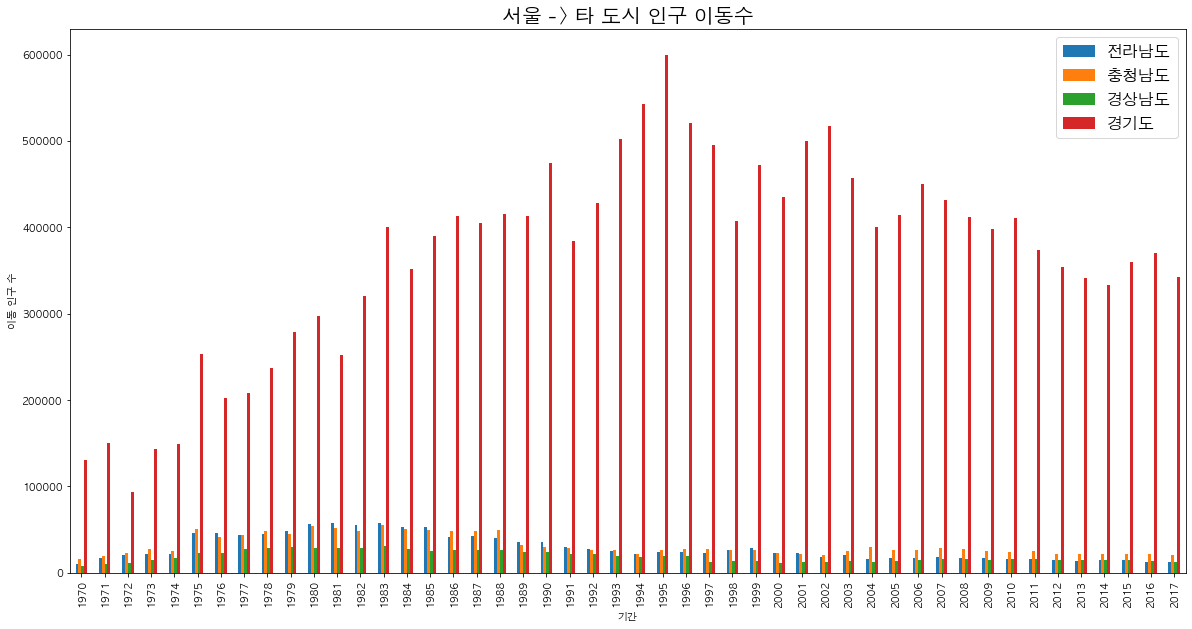

In [65]:
# 히스토그램
ax = df_3.plot(kind='bar', figsize=(20,10))
ax.set_title('서울 -> 타 도시 인구 이동수', size=20)
ax.set_ylabel('이동 인구 수')
ax.set_xlabel('기간')
ax.legend(loc='best', fontsize=16)

plt.show()

/var/folders/8x/my7blpjs0bg1hmjhzgvz02th0000gn/T/ipykernel_929/141204713.py:2: FutureWarning: convert_float is deprecated and will be removed in a future version
  df = pd.read_excel('dataset/남북한발전전력량.xlsx', convert_float=True)


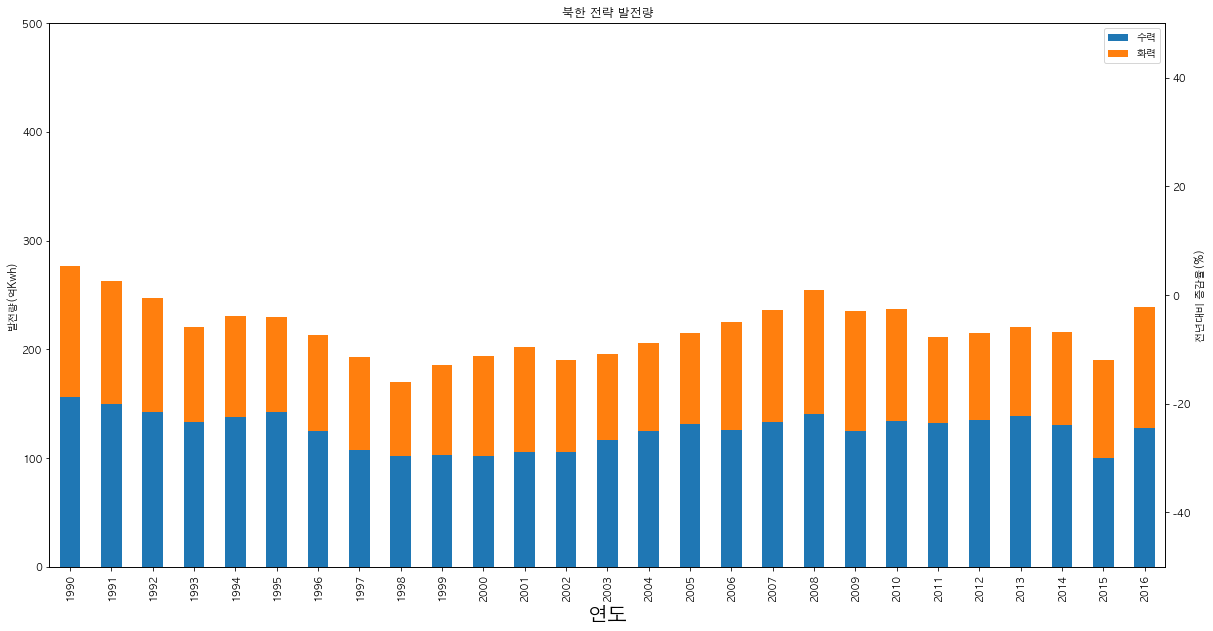

In [66]:
# 남북한 전력 발전량
df = pd.read_excel('dataset/남북한발전전력량.xlsx', convert_float=True)
df.head(10)

# 북한의 자료만 가져옴
df = df.loc[5:9]
# 전력량 칼럼 삭제
df.drop('전력량 (억㎾h)', axis='columns', inplace=True)
# 발전 전력별 컬럼 인덱스로 지정
df.set_index('발전 전력별', inplace=True)

df = df.T
# 년도별로 증감율, '합계' 컬럼명을 '총 발전량'으로 변경
df = df.rename(columns={'합계' : '총 발전량'})

# 총 발전량 -1년 -> 이전 년도의 총 발전량
df['총 발전량 -1년'] = df['총 발전량'].shift(1)

# 증감율 총발전량 / 이전년도 발전량 -1 * 100
df['증감율'] = ((df['총 발전량'] / df['총 발전량 -1년']) -1) * 100

# 그래프 그리기 : 수력, 화력 -> 증감율
ax1 = df[['수력', '화력']].plot(kind='bar', figsize=(20,10), stacked=True)
ax2 = ax1.twinx()

ax.plot(df.index, df['증감율'], ls='--', marker='o', color='r', 
        label='전년대비 증감율(%)')
ax1.set_ylim(0,500)
ax2.set_ylim(-50,50)

ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('발전량(억Kwh)')
ax2.set_ylabel('전년대비 증감율(%)')

plt.title('북한 전략 발전량')
ax1.legend(loc='best')


plt.show()

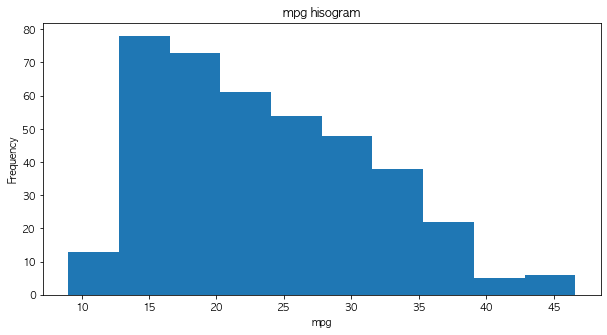

In [67]:
# histogram : 변수 하나

df = pd.read_csv('dataset/auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']
df['mpg'].plot(kind='hist', bins=10, figsize=(10,5))
plt.title('mpg hisogram')
plt.xlabel('mpg')
plt.show()






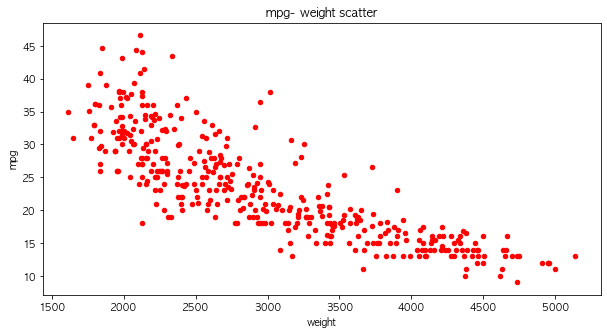

In [68]:
# scatter
df.plot(kind='scatter', x='weight', y='mpg', figsize=(10,5), color='r')
plt.title('mpg- weight scatter')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()




0      300.0
1      300.0
2      300.0
3      300.0
4      300.0
       ...  
393    150.0
394    150.0
395    150.0
396    150.0
397    150.0
Name: cylinders, Length: 398, dtype: float64


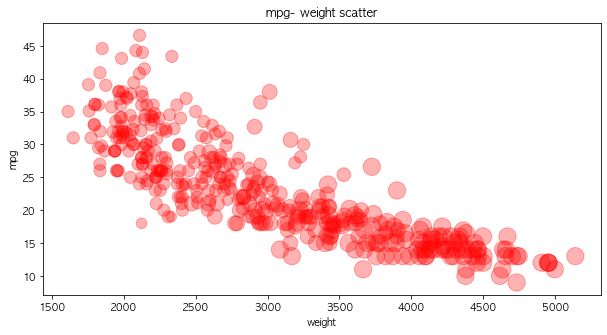

In [38]:
# scatter cylender
cyliners_size = df.cylinders / df.cylinders.max() * 300
print(cyliners_size)
df.plot(kind='scatter', x='weight', y='mpg', figsize=(10,5), color='r',
       s=cyliners_size, alpha=0.3)
plt.title('mpg- weight scatter')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

           mpg  cylinders  displacement    weight  acceleration  model year  \
origin                                                                        
1       5000.8       1556       61229.5  837121.0        3743.4       18827   
2       1952.4        291        7640.0  169631.0        1175.1        5307   
3       2405.6        324        8114.0  175477.0        1277.6        6118   

        count  
origin         
1         249  
2          70  
3          79  


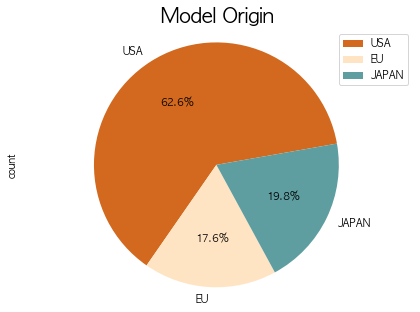

In [69]:
# 데이터 개수 카운트를 위해 값 1을 가진 열을 추가
df['count'] = 1
df_origin = df.groupby('origin').sum()   # origin 열을 기준으로 그룹화, 합계 연산
print(df_origin.head())                  # 그룹 연산 결과 출력

# 제조국가(origin) 값을 실제 지역명으로 변경
df_origin.index = ['USA', 'EU', 'JAPAN']

# 제조국가(origin) 열에 대한 파이 차트 그리기 – count 열 데이터 사용
df_origin['count'].plot(kind='pie', 
                     figsize=(7, 5),
                     autopct='%1.1f%%',   # 퍼센트 % 표시
                     startangle=10,       # 파이 조각을 나누는 시작점(각도 표시)
                     colors=['chocolate', 'bisque', 'cadetblue']    # 색상 리스트
                     )

plt.title('Model Origin', size=20)
plt.axis('equal')    # 파이 차트의 비율을 같게 (원에 가깝게) 조정
plt.legend(labels=df_origin.index, loc='upper right')   # 범례 표시
plt.show()



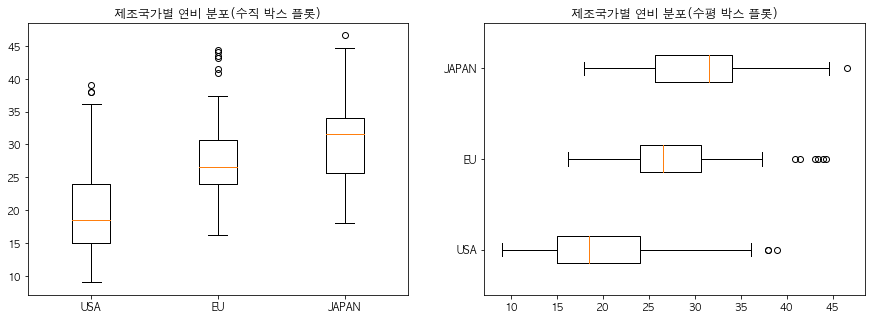

In [75]:
# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# axe 객체에 boxplot 메서드로 그래프 출력
ax1.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']], 
         labels=['USA', 'EU', 'JAPAN'])

ax2.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']], 
         labels=['USA', 'EU', 'JAPAN'],
         vert=False)

ax1.set_title('제조국가별 연비 분포(수직 박스 플롯)')
ax2.set_title('제조국가별 연비 분포(수평 박스 플롯)')

plt.show()
